In [81]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score

In [23]:
#read data with pandas
df = pd.read_csv('./Downloads/Data_for_UCI_named.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification)

In [24]:
#drop stab column
df = df.drop(['stab'], axis = 1)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


Encoding the Stabf column using Label Encoder

In [25]:
le = LabelEncoder()
df['stabf'] = le.fit_transform(df['stabf'])

In [26]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). 

In [34]:

#drop dependent variable
X = df.drop(['stabf'], axis = 1)
y = df['stabf']

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)



In [35]:
#using standardscalar
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the StandardScaler
scaled_X_train =  scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)



In [36]:
#convert the scaled data to dataframes
scaled_X_train_df = pd.DataFrame(scaled_X_train, columns=X.columns)
scaled_X_test_df = pd.DataFrame(scaled_X_test, columns=X.columns)

RANDOM FOREST CLASSIFIER

In [65]:
# Train a random forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(scaled_X_train_df, y_train)

# Get predictions on the test data
rf_pred = rf_clf.predict(scaled_X_test_df)


In [67]:
round(accuracy_score(y_test, rf_pred),4)

0.9225

XGBOOST

In [72]:
xgb = XGBClassifier(random_state=1)
xgb.fit(scaled_X_train_df, y_train)


# Get predictions on the test data
xgb_pred = xgb.predict(scaled_X_test_df)

In [73]:
round(accuracy_score(y_test, xgb_pred),4)

0.9455

LIGHTGBM

In [70]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(scaled_X_train_df, y_train)

# Get predictions
lgbm_pred = lgbm.predict(scaled_X_test_df)


In [71]:
round(accuracy_score(y_test, lgbm_pred),4)

0.9395

EXTRA TREES CLASSIFIER

In [68]:
# Train an extra trees classifier
et_clf = ExtraTreesClassifier()
et_clf.fit(scaled_X_train_df, y_train)

# Get predictions on the test data
et_pred = et_clf.predict(scaled_X_test_df)


In [69]:
round(accuracy_score(y_test, et_pred),4)

0.9215

HYPERPARAMETER TUNING FOR THE EXTRA TREES CLASSIFIER

In [74]:
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['auto','log2']
}

model = RandomizedSearchCV(ExtraTreesClassifier(),param_distributions=param_grid, scoring='accuracy',
                          n_jobs=-1, cv=5, verbose=1, random_state=1)

In [75]:
model.fit(scaled_X_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [76]:
model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2'}

In [77]:
# Train an extra trees classifier
new_et_clf = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features='log2')

new_et_clf.fit(scaled_X_train_df, y_train)

# Get predictions on the test data
new_et_pred = new_et_clf.predict(scaled_X_test_df)

In [78]:
round(accuracy_score(y_test, new_et_pred),4)

0.9255

The accuracy of the new optimal model is higher than the initial ExtraTreesClassifier model with no hyperparameter tuning

 Feture importance 

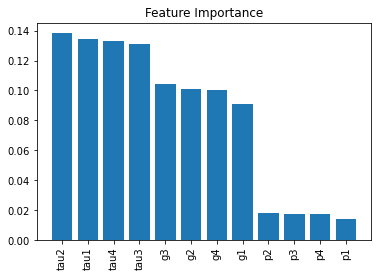

In [80]:
# Get feature importances
importances = new_et_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]


names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

The most and least important features are tau2 and p1 respectively
